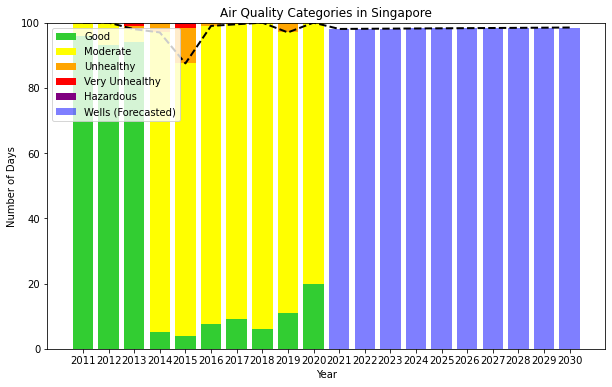

Predicted "Wells" (Good + Moderate) Air Quality for 2021-2030:
2021 : 98
2022 : 98
2023 : 98
2024 : 98
2025 : 98
2026 : 98
2027 : 98
2028 : 98
2029 : 98
2030 : 98


In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Historical data
years = np.array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
good = np.array([96, 93, 94, 5, 4, 7.5, 9, 6, 11, 20])
moderate = np.array([4, 7, 4, 92, 83.5, 91.5, 90.5, 94, 86, 80])
unhealthy = np.array([0, 0, 1, 3, 11, 1, 0.5, 0, 3, 0])
very_unhealthy = np.array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0])
hazardous = np.array([0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0])

# Prepare data for machine learning
X = years.reshape(-1, 1)
y = good + moderate

# Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict air quality for existing and future years
future_years = np.arange(2021, 2031).reshape(-1, 1)
future_wells = model.predict(future_years)

# Plotting the air quality categories
plt.figure(figsize=(10, 6))

# Coloring the rest of the prediction section
plt.bar(years, good, label='Good', color='limegreen')
plt.bar(years, moderate, bottom=good, label='Moderate', color='yellow')
plt.bar(years, unhealthy, bottom=good + moderate, label='Unhealthy', color='orange')
plt.bar(years, very_unhealthy, bottom=good + moderate + unhealthy, label='Very Unhealthy', color='red')
plt.bar(years, hazardous, bottom=good + moderate + unhealthy + very_unhealthy, label='Hazardous', color='purple')

# Plotting the forecasted "Wells" category
plt.bar(future_years.flatten(), future_wells, label='Wells (Forecasted)', color='blue', alpha=0.5)

# Drawing a line to reflect the "Wells" category
plt.plot(np.concatenate((years, future_years.flatten())), np.concatenate((y, future_wells)), color='black', linestyle='--', linewidth=2)

plt.title('Air Quality Categories in Singapore')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.legend(loc='upper left')
plt.xticks(np.concatenate((years, future_years.flatten())))
plt.show()

# Print the predicted air quality for future years
print('Predicted "Wells" (Good + Moderate) Air Quality for 2021-2030:')
for year, wells_count in zip(future_years, future_wells):
    print(year[0], ':', int(wells_count))
